In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [2]:
df = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats', attrs={'id': "results2023-202491_overall"})[0]

In [3]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,20,13,6,1,43,18,25,45,2.25,44.1,22.6,21.5,1.08,W D D W W,52619,Mohamed Salah - 14,Alisson,NaN
1,2,Aston Villa,20,13,3,4,43,27,16,42,2.10,36.0,25.6,10.3,0.52,W W D L W,37295,Ollie Watkins - 9,Emiliano Martínez,NaN
2,3,Manchester City,19,12,4,3,45,21,24,40,2.11,36.8,17.8,18.9,1.00,L W D W W,53297,Erling Haaland - 14,Ederson,NaN
3,4,Arsenal,20,12,4,4,37,20,17,40,2.00,36.4,16.3,20.0,1.00,L W D L L,60169,Bukayo Saka - 6,David Raya,NaN
4,5,Tottenham,20,12,3,5,42,29,13,39,1.95,35.2,34.7,0.4,0.02,W W W L W,61624,Son Heung-min - 12,Guglielmo Vicario,NaN


In [4]:
# Read in the images
df['badge'] = df['Squad'].apply(
    lambda x: f"C:/Users/Louis/OneDrive/Documents/Python/images/{x.lower().replace('é', 'e').replace('á', 'a').replace('í', 'i')}.png"
)

In [5]:
df = df[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]
df

,Rk,badge,Squad,MP,W,D,L,GF,GA,GD,Pts
0,1,C:/Users/Louis/OneDrive/Documents/Python/image...,Liverpool,20,13,6,1,43,18,25,45
1,2,C:/Users/Louis/OneDrive/Documents/Python/image...,Aston Villa,20,13,3,4,43,27,16,42
2,3,C:/Users/Louis/OneDrive/Documents/Python/image...,Manchester City,19,12,4,3,45,21,24,40
3,4,C:/Users/Louis/OneDrive/Documents/Python/image...,Arsenal,20,12,4,4,37,20,17,40
4,5,C:/Users/Louis/OneDrive/Documents/Python/image...,Tottenham,20,12,3,5,42,29,13,39
5,6,C:/Users/Louis/OneDrive/Documents/Python/image...,West Ham,20,10,4,6,33,30,3,34
6,7,C:/Users/Louis/OneDrive/Documents/Python/image...,Brighton,20,8,7,5,38,33,5,31
7,8,C:/Users/Louis/OneDrive/Documents/Python/image...,Manchester Utd,20,10,1,9,22,27,-5,31
8,9,C:/Users/Louis/OneDrive/Documents/Python/image...,Newcastle Utd,20,9,2,9,39,29,10,29
9,10,C:/Users/Louis/OneDrive/Documents/Python/image...,Chelsea,20,8,4,8,34,31,3,28


In [6]:
df2 = pd.read_html('https://fbref.com/en/comps/9/stats/Premier-League-Stats')
for idx,table in enumerate(df2):
 print("***************************")
 print(idx)
 print(table)

***************************
0
   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Squad               # Pl                Age   
0             Arsenal                 23               25.3   
1         Aston Villa                 26               27.4   
2         Bournemouth                 25               26.1   
3           Brentford                 26               27.1   
4            Brighton                 27               26.7   
5             Burnley                 26               25.3   
6             Chelsea                 28               25.0   
7      Crystal Palace                 24               27.6   
8             Everton                 25               27.4   
9              Fulham                 24               29.3   
10          Liverpool                 23               27.2   
11         Luton Town                 23               27.2   
12    Manchester City                 25               27.0   
13     Manchester Utd    

In [7]:
for_prem = pd.DataFrame(df2[0])
against_prem = pd.DataFrame(df2[1])

In [8]:
for_prem.drop(columns=["Per 90 Minutes"], inplace=True)
for_prem.columns = for_prem.columns.droplevel()
for_pred = for_prem[['Squad','Gls','npxG','PrgP']]
against_prem.drop(columns=["Per 90 Minutes"], inplace=True)
against_prem.columns = against_prem.columns.droplevel()
against_pred = against_prem[['Squad','Gls','npxG','PrgP']]
against_pred = against_pred.rename({'Gls':'GlsA', 'npxG':'npxGA','PrgP':'PrgPA'}, axis=1)
against_pred['Squad'] = against_pred['Squad'].str.replace('vs', '')

C:\Users\Louis\AppData\Local\Temp\ipykernel_3900\2904247552.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  for_prem.drop(columns=["Per 90 Minutes"], inplace=True)
C:\Users\Louis\AppData\Local\Temp\ipykernel_3900\2904247552.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  against_prem.drop(columns=["Per 90 Minutes"], inplace=True)


In [9]:
final_pred = pd.merge(for_pred, against_pred, left_index=True, right_index=True, suffixes=('', '_right'))
final_pred.drop(columns=["Squad_right"], inplace=True)
final_pred

,Squad,Gls,npxG,PrgP,GlsA,npxGA,PrgPA
0,Arsenal,36,31.9,1142,20,14.8,458
1,Aston Villa,40,32.9,839,25,25.6,607
2,Bournemouth,28,26.2,620,34,28.8,802
3,Brentford,25,30.4,697,31,24.5,748
4,Brighton,36,32.1,1023,31,25.6,632
5,Burnley,20,16.7,604,39,32.1,786
6,Chelsea,33,33.9,836,31,26.4,686
7,Crystal Palace,22,22.2,610,28,26.2,946
8,Everton,24,30.1,599,26,24.0,873
9,Fulham,27,22.8,775,32,30.7,807


In [10]:
final_pred['Scoring'] = final_pred['Gls']/(final_pred['Gls']+final_pred['GlsA'])*100
final_pred['Creation']= final_pred['npxG']/(final_pred['npxG']+final_pred['npxGA'])*100
final_pred['Progression']= final_pred['PrgP']/(final_pred['PrgP']+final_pred['PrgPA'])*100
final_pred.head()

,Squad,Gls,npxG,PrgP,GlsA,npxGA,PrgPA,Scoring,Creation,Progression
0,Arsenal,36,31.9,1142,20,14.8,458,64.285714,68.308351,71.375000
1,Aston Villa,40,32.9,839,25,25.6,607,61.538462,56.239316,58.022130
2,Bournemouth,28,26.2,620,34,28.8,802,45.161290,47.636364,43.600563
3,Brentford,25,30.4,697,31,24.5,748,44.642857,55.373406,48.235294
4,Brighton,36,32.1,1023,31,25.6,632,53.731343,55.632582,61.812689


In [11]:
prem = final_pred[['Squad','Scoring', 'Creation','Progression']].copy()
print(prem)

              Squad    Scoring   Creation  Progression
0           Arsenal  64.285714  68.308351    71.375000
1       Aston Villa  61.538462  56.239316    58.022130
2       Bournemouth  45.161290  47.636364    43.600563
3         Brentford  44.642857  55.373406    48.235294
4          Brighton  53.731343  55.632582    61.812689
5           Burnley  33.898305  34.221311    43.453237
6           Chelsea  51.562500  56.218905    54.927727
7    Crystal Palace  44.000000  45.867769    39.203085
8           Everton  48.000000  55.637708    40.692935
9            Fulham  45.762712  42.616822    48.988622
10        Liverpool  70.175439  64.262295    62.529002
11       Luton Town  35.714286  31.891892    37.792398
12  Manchester City  68.750000  67.004049    69.821162
13   Manchester Utd  45.833333  46.354167    55.660974
14    Newcastle Utd  57.352941  53.720238    56.897690
15  Nott'ham Forest  40.677966  44.747082    34.745242
16    Sheffield Utd  20.689655  27.599244    30.083565
17        

In [12]:
# data cleaning
#prem[['goals', 'non-pen xG', 'progression']] = prem[['goals', 'non-pen xG', 'progression']].astype(int)

prem['Scoring'] = prem['Scoring'].round(decimals = 1)
prem['Creation'] = prem['Creation'].round(decimals = 1)
prem['Progression'] = prem['Progression'].round(decimals = 1)
prem

,Squad,Scoring,Creation,Progression
0,Arsenal,64.3,68.3,71.4
1,Aston Villa,61.5,56.2,58.0
2,Bournemouth,45.2,47.6,43.6
3,Brentford,44.6,55.4,48.2
4,Brighton,53.7,55.6,61.8
5,Burnley,33.9,34.2,43.5
6,Chelsea,51.6,56.2,54.9
7,Crystal Palace,44.0,45.9,39.2
8,Everton,48.0,55.6,40.7
9,Fulham,45.8,42.6,49.0


In [13]:
final_tab = pd.merge(df, prem, on = "Squad", how = "inner") 
final_tab

,Rk,badge,Squad,MP,W,D,L,GF,GA,GD,Pts,Scoring,Creation,Progression
0,1,C:/Users/Louis/OneDrive/Documents/Python/image...,Liverpool,20,13,6,1,43,18,25,45,70.2,64.3,62.5
1,2,C:/Users/Louis/OneDrive/Documents/Python/image...,Aston Villa,20,13,3,4,43,27,16,42,61.5,56.2,58.0
2,3,C:/Users/Louis/OneDrive/Documents/Python/image...,Manchester City,19,12,4,3,45,21,24,40,68.8,67.0,69.8
3,4,C:/Users/Louis/OneDrive/Documents/Python/image...,Arsenal,20,12,4,4,37,20,17,40,64.3,68.3,71.4
4,5,C:/Users/Louis/OneDrive/Documents/Python/image...,Tottenham,20,12,3,5,42,29,13,39,59.1,52.4,63.3
5,6,C:/Users/Louis/OneDrive/Documents/Python/image...,West Ham,20,10,4,6,33,30,3,34,52.5,44.8,35.9
6,7,C:/Users/Louis/OneDrive/Documents/Python/image...,Brighton,20,8,7,5,38,33,5,31,53.7,55.6,61.8
7,8,C:/Users/Louis/OneDrive/Documents/Python/image...,Manchester Utd,20,10,1,9,22,27,-5,31,45.8,46.4,55.7
8,9,C:/Users/Louis/OneDrive/Documents/Python/image...,Newcastle Utd,20,9,2,9,39,29,10,29,57.4,53.7,56.9
9,10,C:/Users/Louis/OneDrive/Documents/Python/image...,Chelsea,20,8,4,8,34,31,3,28,51.6,56.2,54.9


In [14]:
# Set up the colors
# Use Coolors to get the color hex codes: https://coolors.co/?ref=65623355a0453d000b8a2708
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

row_colors = {
    "West Ham": "#F5CCDD",
    "oppo": "#C0E4ED",
    "relegation": "#EFFADB",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [15]:
col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Scoring",
        group="Underlying data ratings",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(final_tab["Scoring"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="Creation",
        group="Underlying data ratings",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(final_tab["Creation"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="Progression",
        group="Underlying data ratings",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(final_tab["Progression"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

C:\Users\Louis\AppData\Local\Temp\ipykernel_3900\2018755488.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


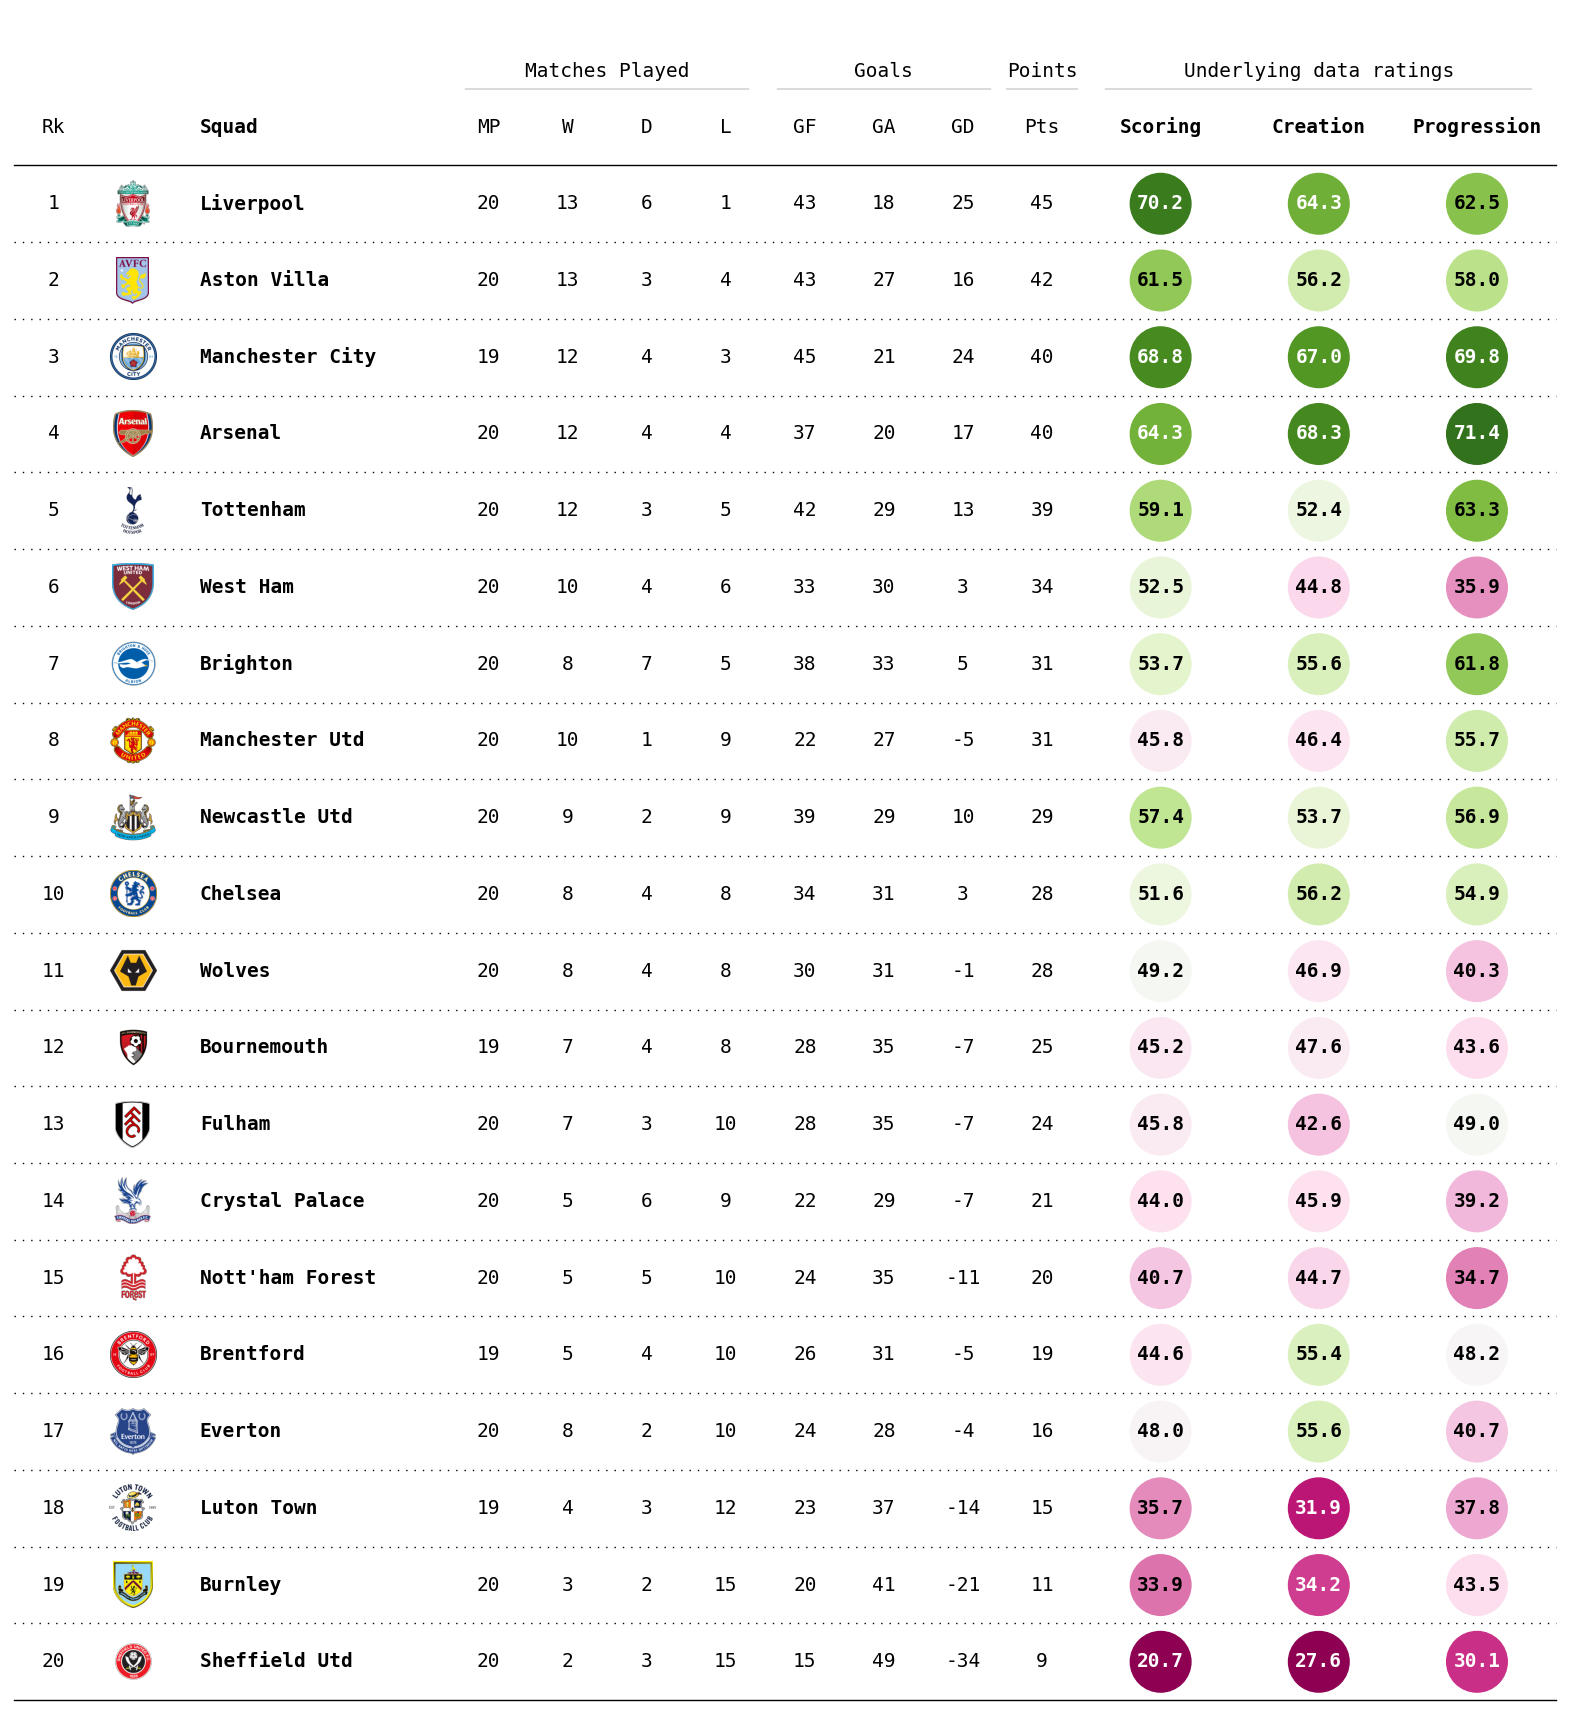

In [17]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    final_tab,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["Scoring", "Creation", "Progression"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"
# Here we can add colors to the rows
# I personally don't like the look of this, but it's an option

#for idx in [6]:
 #table.rows[idx].set_facecolor(row_colors["West Ham"])

#for idx in [1]:
 #table.rows[idx].set_facecolor(row_colors["oppo"])
#
#
#for idx in [17, 18, 19]:
# table.rows[idx].set_facecolor(row_colors["relegation"])


fig.show()